In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-mix-dataset/marketing_mix.csv


In [2]:
!pip install pymc

  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.0 MB/s eta 0:00:00
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9098 sha256=8f012aa8711a9b745c97c675f2208318e5e0474456c0aaee246a9597dad5691c
  Stored in directory: /root/.cache/pip/wheels/a4/11/f5/8265470e17d280d8b5910e1b0f298521420a5086d696e96799
  Created wheel for logical-unification: filename=logical_unification-0.4.6-py3-none-any.whl size=13911 sha256=83acb916d705712f1ea968e4d70a16c13f29231f957bc2f5b94bb09dfb6af689
  Stored in directory: /root/.cache/pip/wheels/ba/95/1f/29d557452d7f5102769d

In [3]:
df = pd.read_csv('/kaggle/input/marketing-mix-dataset/marketing_mix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        200 non-null    object 
 1   TikTok      200 non-null    float64
 2   Facebook    200 non-null    float64
 3   Google Ads  200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,Date,TikTok,Facebook,Google Ads,Sales
0,1/7/2018,13528.1,0.00,0.00,9779.80
1,1/14/2018,0.0,5349.65,2218.93,13245.19
2,1/21/2018,0.0,4235.86,2046.96,12022.66
3,1/28/2018,0.0,3562.21,0.00,8846.95
4,2/4/2018,0.0,0.00,2187.29,9797.07


Mean Squared Error: 1269175.8780986685
R-squared Score: 0.8329686175393195


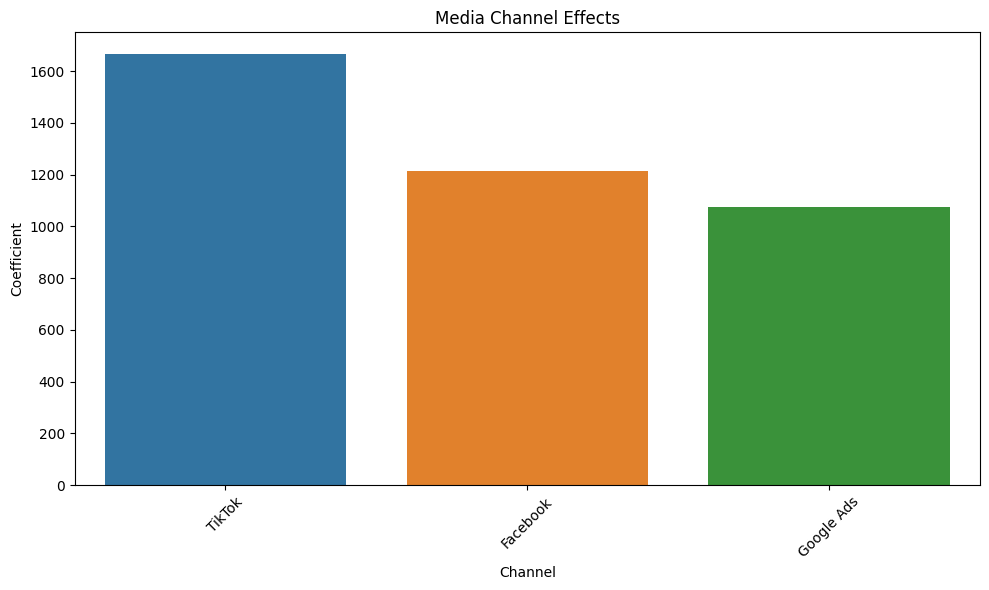

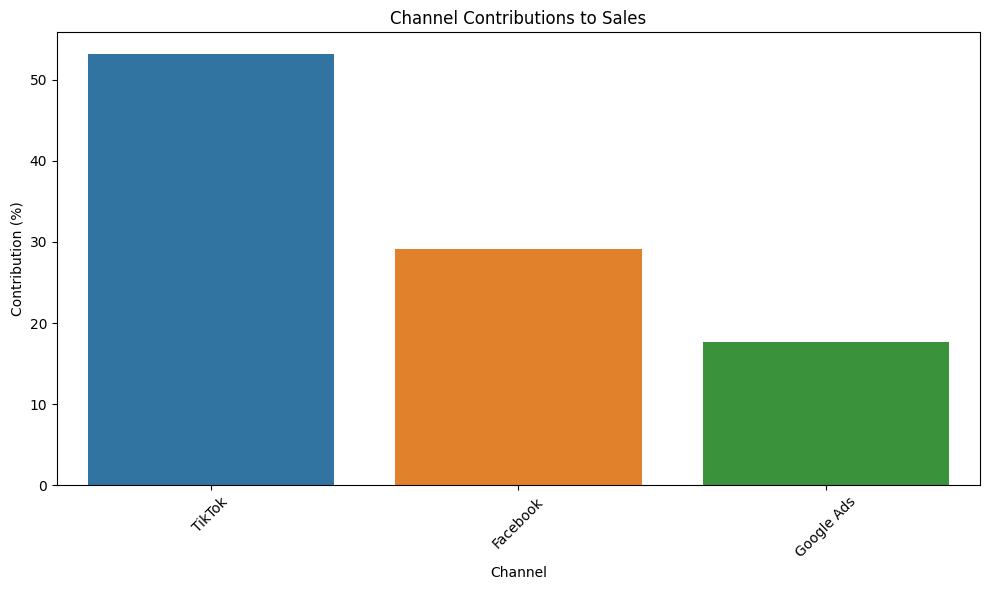

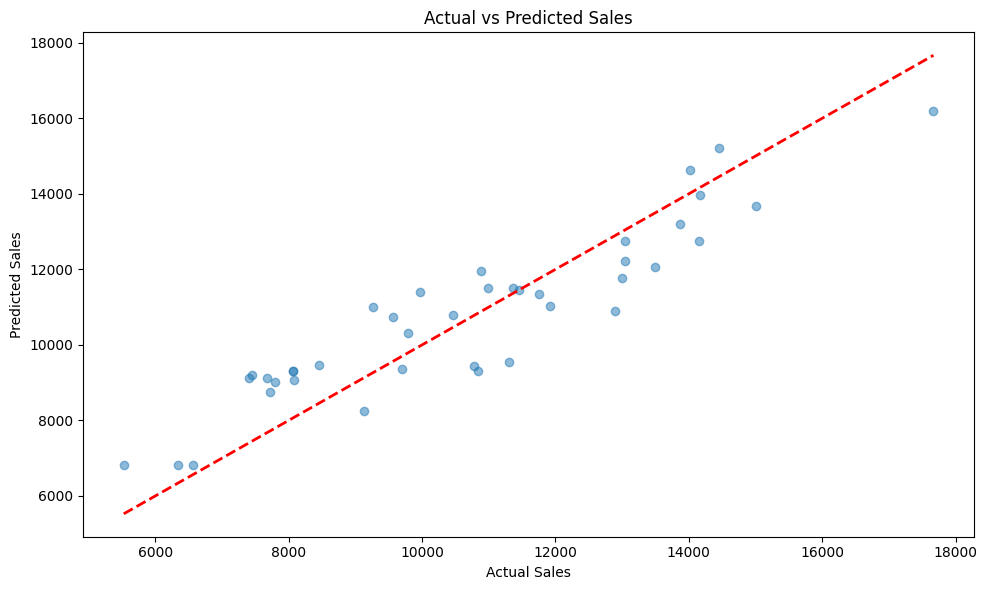

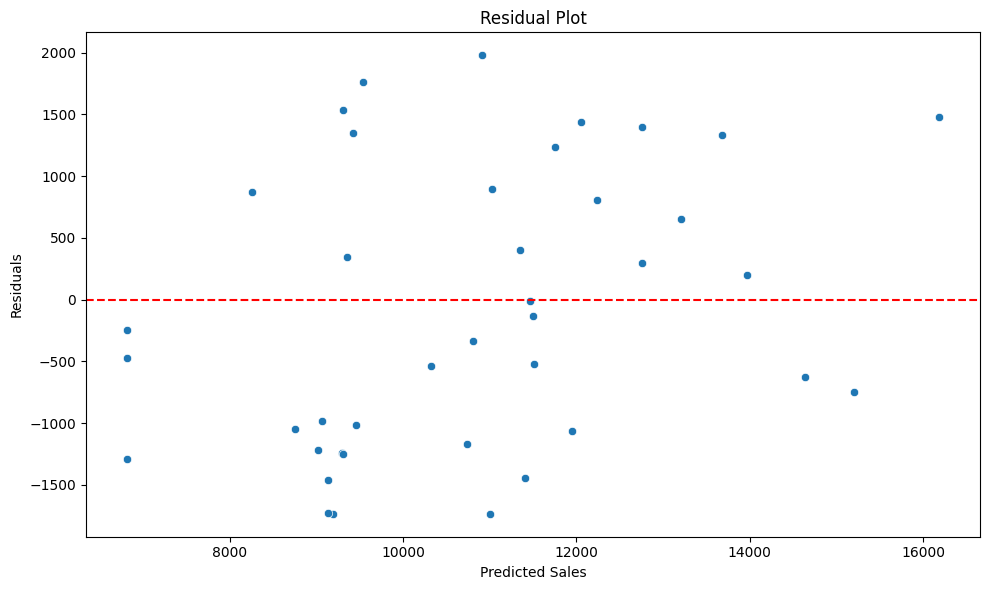

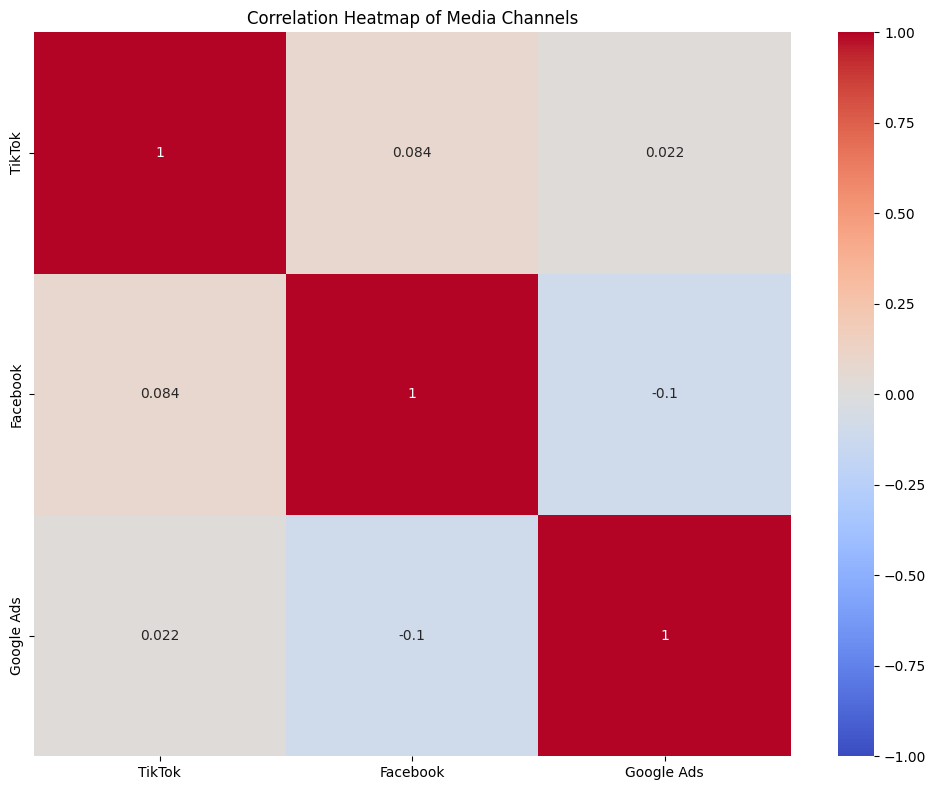

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')

# Prepare the data
X = df[['TikTok', 'Facebook', 'Google Ads']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model
alpha = 1.0
model = Ridge(alpha=alpha)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Get the coefficients (media channel effects)
coefficients = pd.DataFrame({
    'Channel': X.columns,
    'Coefficient': model.coef_
})

# Calculate the contribution of each channel
contributions = pd.DataFrame({
    'Channel': X.columns,
    'Contribution': model.coef_ * X.mean()
})
contributions['Contribution %'] = contributions['Contribution'] / contributions['Contribution'].sum() * 100

# Visualization 1: Coefficient Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Coefficient', data=coefficients)
plt.title('Media Channel Effects')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Contribution Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Channel', y='Contribution %', data=contributions)
plt.title('Channel Contributions to Sales')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.tight_layout()
plt.show()

# Visualization 4: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Visualization 5: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Media Channels')
plt.tight_layout()
plt.show()